# Descrição do projeto:


# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. 

(Conjunto de dados modificado a partir do original).

## Dicionário de dados

Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados


## Plano de solução




Nesta etapa, irei importar as bibliotecas, criar variáveis para ler o dados dos dataframes, usar o método head em cada dataframe para analisar os dados e descobrir os parâmetros apropriados e, então, usar info para imprimir as informações de cada um.

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
df_orders = pd.read_csv('instacart_orders.csv', sep=';')
df_products = pd.read_csv('products.csv', sep=';')
df_aisles = pd.read_csv('aisles.csv', sep=';')
df_departments = pd.read_csv('departments.csv', sep=';')
df_order_products = pd.read_csv('order_products.csv', sep=';')
print(df_order_products.head(10))

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
5   2456893       21616                4.0          1
6    644579       12341                5.0          1
7   2231852       44925               10.0          1
8   3185766       36259               14.0          1
9    420019       23315                4.0          1


In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [10]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [12]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [13]:
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões



Ao chamar o método info, observamos que não há muitas colunas em cada dataframe, alguns dataframes possuem colunas em comum e poucas possuem valores ausentes.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados:

-	Verifique e corrija os tipos de dados
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Forneça explicações.

## Plano de solução

Escreva seu plano para a Etapa 2. Preparação de dados

Verificar e remover valores duplicados, verificar e preencher valores ausentes. Essas ações deverão ser feitas para cada dataframe, com os métodos corretos. Deixarei os dados mais limpos para análises futuras.

## Encontre e remova valores duplicados (e aponte por que você está fazendo suas escolhas)

### DataFrame `orders`

In [14]:
#verificando pedidos duplicados
df_orders.duplicated().sum()
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Usei duplicated com sum para ver o número de duplicatas e depois usei a filtragem para ver de fato as linhas duplicadas e poder analisar as semelhanças. Há 15 pedidos duplicados e todos eles foram feitos no mesmo horário e dia da semana.

In [15]:
#verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
orders_wed_2hr = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
orders_wed_2hr[orders_wed_2hr.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Os resultados mostram que os pedidos duplicados estão dentro desses parâmetros (pedidos feitos às quartas-feiras, às 2 horas).

In [16]:
#removendo pedidos duplicados
df_orders = df_orders.drop_duplicates()

In [17]:
#verificando as linhas duplicadas mais uma vez
df_orders.duplicated().sum()

0

In [18]:
#verificando novamente apenas os IDs de pedidos duplicados
df_orders['order_id'].duplicated().sum()

0

Observei que havia um padrão nos pedidos duplicados, talvez por um bug ocorrido no site no determinado momento em que esses pedidos foram feitos (às 2horas de quarta-feira) e, então, removi esses pedidos duplicados.

### DataFrame `products`

In [19]:
#verificando a presença de linhas completamente duplicadas
df_products.duplicated().sum()

0

In [20]:
#verificando apenas se há IDs de produtos duplicados
df_products['product_id'].duplicated().sum()

0

In [21]:
#convertendo os nomes para letras minúsculas e verificando apenas se há nomes de produtos duplicados
df_products['product_name'] = df_products['product_name'].str.lower()
df_products['product_name'].duplicated().sum()

1361

In [22]:
#verificando os nomes de produtos duplicados que não estão faltando
df_products[df_products['product_name'].duplicated(keep=False) & ~df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
41,42,biotin 1000 mcg,47,11
185,186,fresh scent dishwasher detergent with dawn,74,17
515,516,american cheese slices,21,16
1538,1539,cauliflower head,83,4
1783,1784,nutrition protein mix blueberry nut,117,19
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


Não há linhas totalmente duplicadas, mas faz sentido ter alguns elementos duplicados; um produto pode ter sido comprado mais de uma vez, por exemplo, e essa informação poderia ser útil em nossa análise.

### DataFrame `departments`

In [23]:
#verificando a presença de linhas completamente duplicadas
df_departments.duplicated().sum()

0

In [24]:
#verificando apenas se há IDs dos departamentos duplicados
df_departments['department_id'].duplicated().sum()

0

Ao usar o método duplicated com sum, verificamos que não há linhas totalmente duplicadas, nem ids de departamento duplicados.

### DataFrame `aisles`

In [25]:
#verificando a presença de linhas completamente duplicadas
df_aisles.duplicated().sum()

0

In [26]:
#verificando apenas se há IDs dos corredores duplicados
df_aisles['aisle_id'].duplicated().sum()

0

Ao usar o método duplicated com sum, verificamos que não há linhas totalmente duplicadas, nem ids de corredores duplicados.

### DataFrame `order_products`

In [27]:
#verificando a presença de linhas completamente duplicadas
df_order_products.duplicated().sum()

0

In [28]:
#verificando mais uma vez se há outros casos complicados de duplicatas
df_order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered'], keep=False).sum()

0

Ao usar o método duplicated com sum, verificamos que não há casos de duplicatas neste dataframe.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [29]:
#encontrando valores ausentes na coluna 'product_name'
df_products['product_name'].isna().sum()

1258

Há 1258 valores ausentes na coluna 'product_name'.

In [30]:
#verificando se todos os nomes de produtos ausentes estão associados com a seção de ID 100
lines_names_nan = df_products[df_products['product_name'].isna()]
aisle_ids = lines_names_nan['aisle_id'].unique()
print(aisle_ids)

[100]


Após fazer a filtragem de valores ausentes com isna e usar unique para verificar os ids de seção dessa filtragem, vemos que sim, todos os nomes de produtos ausentes estão associados à seção de id 100.

In [31]:
#verificando se todos os nomes de produtos ausentes estão associados com o departamento de ID 21
department_ids = lines_names_nan['department_id'].unique()
print(department_ids)

[21]


Ao usar unique, após a filtragem da célula anterior, para verificar os ids de departamento dessa filtragem, vemos que sim, todos os nomes de produtos ausentes estão associados ao departamento de id 21.

In [32]:
#verificando os dados da seção ID 100 e do departamento ID 21.
aisle_id100 = df_aisles.query('aisle_id == 100')['aisle']
print(aisle_id100)
department_id21 = df_departments.query('department_id == 21')['department']
print(department_id21)

99    missing
Name: aisle, dtype: object
20    missing
Name: department, dtype: object


Usamos o método query para filtragem personalizada e verificação.

O resultado 'missing' para ambos os ids mostra que não temos dados disponíveis para a seção de id 100, nem para o departamento de id 21.

In [33]:
#preenchendo os nomes de produtos ausentes com 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna(value='Unknown')
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Substituímos os valores ausentes de nomes de produtos por 'Unknown' (desconhecido) com o método fillna, após perceber que não existem dados disponíveis para preencher esses valores ausentes de outra maneira.

### DataFrame `orders`

In [34]:
#encontrando valores ausentes
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [35]:
#verificando se há valores ausentes para os clientes que não estão fazendo o primeiro pedido
old_clients = df_orders[df_orders['order_number'] > 1]['user_id'].unique()
old_clients_nan = df_orders[df_orders['user_id'].isin(old_clients)].isna().sum()
print(old_clients_nan)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    20977
dtype: int64


Como podemos perceber após a filtragem de clientes que não estão fazendo o primeiro pedido e a contagem de valores ausentes para eles, com isna e sum, há sim valores ausentes para esses clientes. (Se houvessem valores ausentes em days_since_prior_order apenas para novos clientes, isso não seria um problema, uma vez que não haveriam dados antigos para serem preenchidos).

### DataFrame `order_products`

In [36]:
#encontrando valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [37]:
#encontrando os valores mínimo e máximo dessa coluna
add_to_cart_order_min = df_order_products['add_to_cart_order'].min()
print(add_to_cart_order_min)
add_to_cart_order_max = df_order_products['add_to_cart_order'].max()
print(add_to_cart_order_max)

1.0
64.0


Como a coluna 'add_to_cart_order' representa a ordem em que os produtos foram adicionados ao carrinho, esse resultado nos mostra que foram adicionados no mínimo um produto e no máximo 64 produtos em um pedido.

In [38]:
#salvando os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
order_ids_nan = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [39]:
#verificando se todos os pedidos com valores ausentes contêm mais de 64 produtos
#agrupando os pedidos com dados ausentes por ID de pedido
#contando o número de 'product_id' em cada pedido e verificando o valor mínimo da contagem
orders_count = df_order_products[df_order_products['order_id'].isin(order_ids_nan)].groupby('order_id')['product_id'].count()
orders_count_min = orders_count.min()
print(orders_count_min)

65


Usamos isna para verificar os valores ausentes e agrupamos com o método count, para a contagem dos produtos em cada pedido. Com um resultado mínimo maior que 64, é possível concluir que sim, todos os pedidos com valores ausentes contêm mais de 64 produtos.

(Considerando que o resultado encontrado para quantidade de produtos em pedidos com valores ausentes (65) foi maior que o valor encontrado para o número máximo de produtos adicionados ao carrinho em um pedido (64), é possível supor que o cliente possa adicionar, ao mesmo tempo, mais de uma unidade de produto no carrinho).

In [40]:
#substituindo valores ausentes na coluna 'add_to_cart_order' por 999 e convertendo a coluna para o tipo integer
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(value=999).astype('int')

Faz mais sentido os dados de add_to_cart_order serem do tipo int do que float, uma vez que essa coluna representa a ordem em que cada produto foi adicionado ao carrinho. Portanto, não faz sentido termos números decimais nesse caso. (E não há pedidos com 999 itens, por isso esse valor para substituição de valores ausentes).

## Conclusões


Foram observados e eliminados os valores duplicados presentes nas tabelas, após perceber semelhanças entre eles. Foram encontrados valores ausentes, e também pudemos perceber alguns padrões nesses valores. Eles foram preenchidos de acordo com suas necessidades e coerência.

# Etapa 3. Análise de dados

Execute a seguinte análise:

# [A] 

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [41]:
df_orders['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4], dtype=int64)

In [42]:
df_orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2], dtype=int64)

Sim, os valores de 'order_hour_of_day' variam de 0 a 23 e os valores de 'order_dow' variam de 0 a 6. Logo, ambos fazem sentido.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

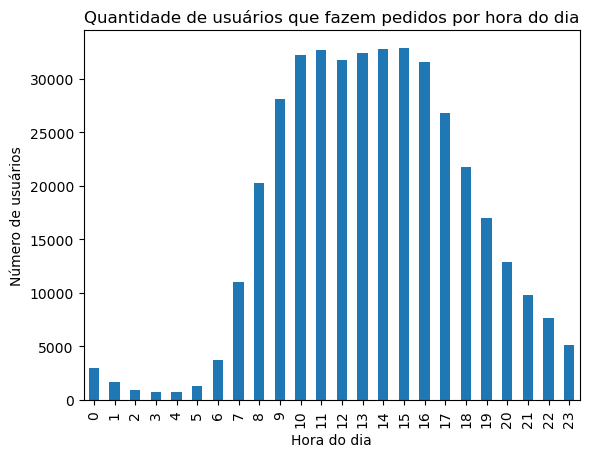

In [43]:
users_hour = df_orders.groupby('order_hour_of_day')['user_id'].nunique()
users_hour.plot(x='order_hour_of_day',
              y='user_id',
              title='Quantidade de usuários que fazem pedidos por hora do dia',
              xlabel='Hora do dia',
              ylabel='Número de usuários',
              xlim=[0, 23],
              kind='bar')
plt.show()

Há mais pedidos sendo  feitos entre 10 e 16 horas.

### [A3] Em que dia da semana as pessoas fazem compras?

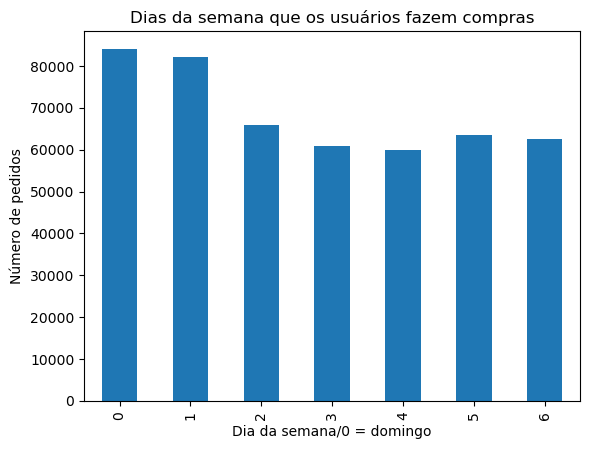

In [44]:
users_day = df_orders.groupby('order_dow')['order_id'].count()
users_day.plot(x='order_dow',
              y='order_id',
              title='Dias da semana que os usuários fazem compras',
              xlabel='Dia da semana/0 = domingo',
              ylabel='Número de pedidos',
              xlim=[0, 6],
              kind='bar')
plt.show()

O dia da semana em que as pessoas mais fazem compras é domingo. O segundo dia que mais fazem compras é segunda-feira (ou seja, a maioria das pessoas fazem compras no início da semana).

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

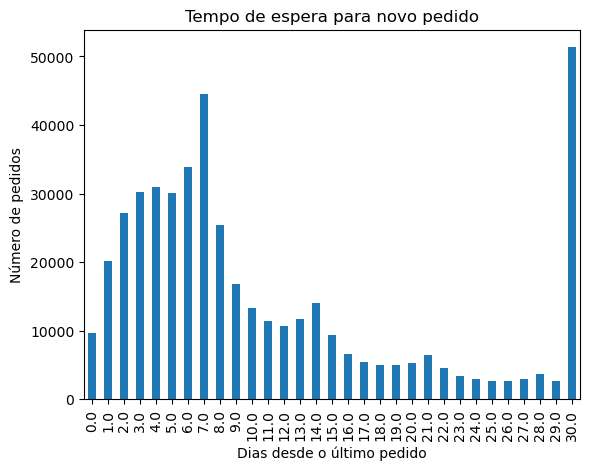

In [45]:
users_wait = df_orders.groupby('days_since_prior_order')['order_id'].count()
users_wait.plot(x='days_since_prior_order',
              y='order_id',
              title='Tempo de espera para novo pedido',
              xlabel='Dias desde o último pedido',
              ylabel='Número de pedidos',
              kind='bar')
plt.show()

O número de dias que as pessoas mais esperam para fazerem novos pedidos é 30 e, em segundo lugar, 7 dias. Essa quantidade de dias mostra que grande parte das pessoas faz compras mensais ou semanais. Sobre os valores mínimo e máximo: A maior parte das pessoas espera 30 dias para fazer um novo pedido e a minoria espera 29 dias. As pessoas tendem a esperar completar 30 dias, que é a média de dias que temos em um mês. Caso não façam pedidos mensais ou semanais, muitos usuários fazem pedidos regularmente, com um pequeno intervalo de dias entre eles.

# [B]

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [46]:
order_hour_wed = df_orders[df_orders['order_dow'] == 3].groupby('order_hour_of_day')['order_id'].count()

In [47]:
order_hour_sat = df_orders[df_orders['order_dow'] == 6].groupby('order_hour_of_day')['order_id'].count()

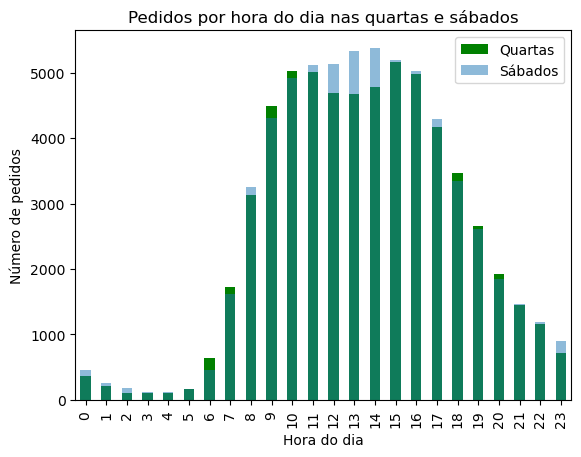

In [48]:
order_hour_wed.plot(kind='bar', color='green')
order_hour_sat.plot(kind='bar', alpha=0.5)
plt.xticks(range(24))
plt.xlabel('Hora do dia')
plt.ylabel('Número de pedidos')
plt.title('Pedidos por hora do dia nas quartas e sábados')
plt.legend(['Quartas', 'Sábados'])
plt.show()

Há pouca diferença na distribuição de pedidos por hora do dia nas quartas e sábados. A maior diferença está entre meio dia e 14 horas, quando o número de pedidos aos sábados é maior que nas quartas. No geral, há mais pedidos sendo feitos nos sábados do que nas quartas.

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [49]:
orders_per_client = df_orders.groupby('user_id')['order_id'].count()

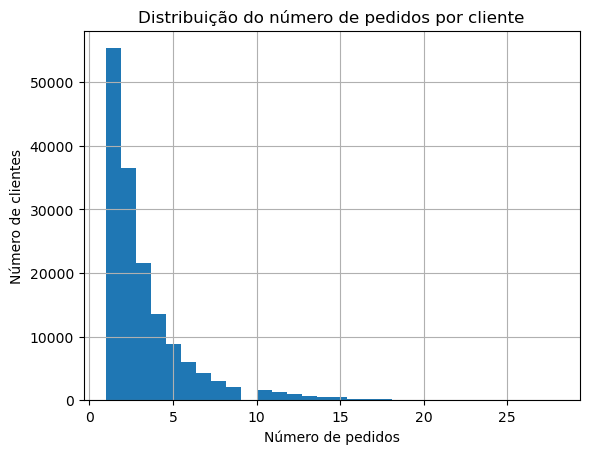

In [50]:
hist_orders_per_client = orders_per_client.hist(bins=30)
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.title('Distribuição do número de pedidos por cliente')
plt.show()

A maioria dos clientes fizeram poucos pedidos, a maior parte se concentra em até 5 pedidos.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [51]:
top_products = df_order_products.groupby('product_id')['order_id'].count().sort_values(ascending=False).head(20)

Para contar quantas vezes um produto foi comprado, foram agrupados os dados do dataframe order_products por product_id com order_id, seguido do método count(). Para encontrar os 20 produtos mais comprados e classificar os resultados em ordem decrescente, foi usado o método sort_values com o parâmetro ascending=False e head(20), para as primeiras 20 linhas.

In [52]:
top_products_merge = top_products.reset_index().merge(df_products, on='product_id', how='left')

Em seguida, usamos merge para juntar df_order_products com df_products e obter mais informações sobre os produtos, a partir da coluna product_id. Reset_index redefine os índices pós agrupamento. O parâmetro left mantêm todas as linhas do dataframe à esquerda (top_products) e apenas as linhas correspondentes de df_products.

In [53]:
top_products_merge.rename(columns={'order_id': 'order_count'}, inplace=True)

In [54]:
top_products_merge[['product_id', 'product_name', 'order_count']]

,product_id,product_name,order_count
0,24852,banana,66050
1,13176,bag of organic bananas,53297
2,21137,organic strawberries,37039
3,21903,organic baby spinach,33971
4,47209,organic hass avocado,29773
5,47766,organic avocado,24689
6,47626,large lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic whole milk,19600


Por fim, temos as colunas de interesse, product_id e product_name, que exibem ids e nomes dos 20 produtos comprados com mais frequência. Também foi adicionada a coluna order_count.

A maioria dos 20 produtos mais comprados são orgânicos.

# [C]

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [55]:
products_per_order = df_order_products.groupby('order_id')['product_id'].count()

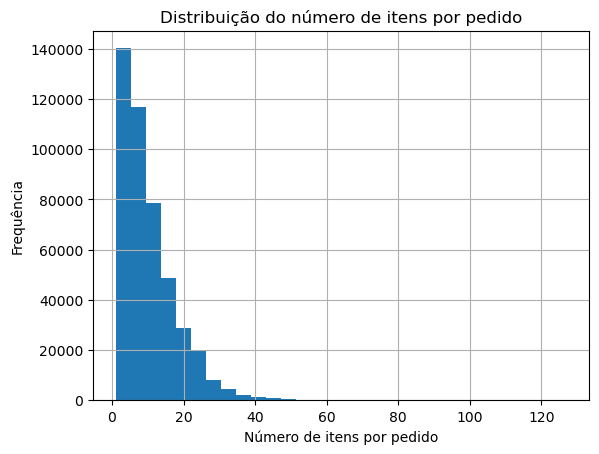

In [56]:
hist_products_per_order = products_per_order.hist(bins=30)
plt.xlabel('Número de itens por pedido')
plt.ylabel('Frequência')
plt.title('Distribuição do número de itens por pedido')
plt.show()

Primeiro, contamos os produtos por pedido, depois fizemos um histograma para mostrar a distribuição desses itens para cada pedido.

A maioria das pessoas costuma comprar até 20 itens por pedido.

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [57]:
product_counts_reordered = df_order_products[df_order_products['reordered'] == 1].groupby('product_id')['order_id'].count()

Filtramos apenas pedidos repetidos, depois agrupamos com groupby por product_id e order_id, seguido do método count, para contar quantas vezes cada produto foi incluído nos pedidos repetidos.

In [58]:
top_reordered_products = product_counts_reordered.sort_values(ascending=False).head(20)

Assim como em exercício anterior, foi usado o método sort_values com o parâmetro ascending=False e head(20), para as primeiras 20 linhas, para encontrar os 20 produtos mais incluídos em pedidos repetidos, em ordem decrescente.

In [59]:
top_reordered_products_merge = top_reordered_products.reset_index().merge(df_products, on='product_id', how='left')

Usamos merge para juntar df_order_products com df_products e obter mais informações sobre os produtos, a partir da coluna product_id. Reset_index redefine os índices pós agrupamento. O parâmetro left mantêm todas as linhas do dataframe à esquerda (top_reordered_products) e apenas as linhas correspondentes de df_products.

In [60]:
top_reordered_products_merge.rename(columns={'order_id': 'reordered_count'}, inplace=True)

In [61]:
top_reordered_products_merge[['product_id', 'product_name', 'reordered_count']]

,product_id,product_name,reordered_count
0,24852,banana,55763
1,13176,bag of organic bananas,44450
2,21137,organic strawberries,28639
3,21903,organic baby spinach,26233
4,47209,organic hass avocado,23629
5,47766,organic avocado,18743
6,27845,organic whole milk,16251
7,47626,large lemon,15044
8,27966,organic raspberries,14748
9,16797,strawberries,13945


Por fim, temos as colunas de interesse, product_id e product_name, que exibem ids e nomes dos 20 itens incluídos com mais frequência em pedidos repetidos. Também foi adicionada a coluna reordered_count.

Vemos um resultado semelhante ao dos 20 itens mais comprados.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [62]:
total_orders_per_product = df_order_products.groupby('product_id')['order_id'].nunique()

Primeiro, calculamos o número total de pedidos para cada produto.

In [63]:
repeated_orders_per_product = df_order_products[df_order_products['reordered'] == 1].groupby('product_id')['order_id'].nunique()

Depois, calculamos o número de pedidos repetidos para cada produto. (O número 1 na coluna 'reordered' significa que o cliente já comprou o produto antes, então filtramos por essa condição).

In [64]:
repeated_orders_prop_per_product = repeated_orders_per_product / total_orders_per_product

Em seguida, dividimos o número de pedidos repetidos para cada produto pelo total de pedidos para cada produto, para calcular a proporção de pedidos repetidos para cada produto.

In [65]:
df_repeated_orders_prop = pd.DataFrame({
    'product_id': repeated_orders_prop_per_product.index,
    'repeated_orders_prop': repeated_orders_prop_per_product.values
})

Criamos o dataframe (tabela) com as colunas de ID do produto e da proporção de pedidos repetidos (.index retorna os índices do objeto repeated_orders_prop_per_product, que são os product ids e .values retorna os valores associados à esses índices, que são as proporções). Para a coluna de nome do produto, fazemos a junção do novo dataframe com o dataframe df_products, por meio da coluna 'product_id', para agregar as informações de interesse, pela coluna 'product_name'. Desta forma:

In [66]:
df_repeated_orders_prop = df_repeated_orders_prop.merge(df_products, on='product_id', how='left')

In [67]:
df_repeated_orders_prop

,product_id,repeated_orders_prop,product_name,aisle_id,department_id
0,1,0.564286,chocolate sandwich cookies,61,19
1,2,NaN,all-seasons salt,104,13
2,3,0.738095,robust golden unsweetened oolong tea,94,7
3,4,0.510204,smart ones classic favorites mini rigatoni wit...,38,1
4,7,0.500000,pure coconut water with orange,98,7
...,...,...,...,...,...
45568,49690,0.800000,high performance energy drink,64,7
45569,49691,0.430556,original pancake & waffle mix,130,14
45570,49692,0.416667,organic instant oatmeal light maple brown sugar,130,14
45571,49693,0.440000,spring water body wash,127,11


In [68]:
df_repeated_orders_prop['repeated_orders_prop'].min()

0.01098901098901099

In [69]:
df_repeated_orders_prop['repeated_orders_prop'].max()

1.0

Considerando que o mínimo da proporção de pedidos repetidos para cada produto é 0.01098901098901099 e o máximo é 1, vemos que, para alguns produtos, a proporção de pedidos repetidos é muito baixa e, para outros, muito alta. No caso da proporção baixa, a maioria dos pedidos desses produtos é composta por itens diferentes e, no caso da proporção alta, a maioria dos pedidos desses produtos é composta pelos mesmos itens. Produtos com uma alta proporção de pedidos repetidos podem ser aqueles que os usuários tendem a comprar com mais frequência.

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [70]:
total_orders_per_client = df_orders.groupby('user_id')['order_id'].count()

Agrupamos os pedidos por cliente, para calcular a quantidade total de pedidos para cada cliente com .count.

In [71]:
reorders_per_client = df_orders[df_orders['order_number'] > 1].groupby('user_id')['order_id'].count()

Agrupamos os pedidos repetidos por cliente, filtrando pelo número de vezes que um pedido foi feito, para calcular a quantidade total de pedidos repetidos por cliente com .count.

In [72]:
reorders_prop_per_client = reorders_per_client / total_orders_per_client

E então, para achar a proporção de todos os pedidos repetidos por cliente, dividimos a quantidade de pedidos repetidos por cliente pela quantidade total de pedidos para cada cliente.

In [73]:
print(reorders_prop_per_client)

user_id
2         0.5
4         1.0
5         1.0
6         0.5
7         1.0
         ... 
206203    1.0
206206    1.0
206207    1.0
206208    1.0
206209    1.0
Name: order_id, Length: 157437, dtype: float64


In [74]:
reorders_prop_per_client.max()

1.0

In [75]:
reorders_prop_per_client.min()

0.5

Considerando que o valor mínimo de reorders_prop_per_client é 0.5, cada cliente fez pelo menos um pedido repetido (uma vez que o mínimo não é 0). Para os clientes com resultado 1, significa que todos os pedidos feitos por ele foram repetidos.

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [81]:
first_added_products = df_order_products[df_order_products['add_to_cart_order'] == 1].groupby('product_id')['order_id'].count()

Para obter o número de vezes que cada produto foi o primeiro a ser adicionado a um carrinho, filtramos 'df_order_products' para quando 'add_to_cart_order' é igual a 1, agrupamos por 'product_id' e fizemos a contagem em 'order_id'.

In [93]:
first_20_added_products = first_added_products.sort_values(ascending=False).head(20)

Ordenamos esses valores em ordem decrescente com .sort_values(ascending=False) e selecionamos os 20 principais itens com .head(20).

In [84]:
first_20_added_products_merge = first_20_added_products.reset_index().merge(df_products, on='product_id', how='left')

Redefinimos os índices com .reset_index() pós agrupamento. Usando .merge(), juntamos as informações anteriores com df_products, pela coluna em comum 'product_id', para obter os dados dos nomes dos produtos, além de seus ids e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.

In [85]:
first_20_added_products_merge.dropna(subset=['product_name'], inplace=True)

Aqui, excluímos linhas da coluna 'product_name' com valores ausentes.

In [91]:
first_20_added_products_merge.rename(columns={'order_id': 'first_added_count'}, inplace=True)

Renomeamos a coluna que representa o número de vezes que um produto foi o primeiro a ser adicionado a um carrinho.

In [92]:
first_20_added_products_merge[['product_id', 'product_name', 'first_added_count']]

,product_id,product_name,first_added_count
0,24852,banana,15562
1,13176,bag of organic bananas,11026
2,27845,organic whole milk,4363
3,21137,organic strawberries,3946
4,47209,organic hass avocado,3390
5,21903,organic baby spinach,3336
6,47766,organic avocado,3044
7,19660,spring water,2336
8,16797,strawberries,2308
9,27966,organic raspberries,2024


Os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros são todos comidas ou bebidas e vários deles são orgânicos.

# Conclusão geral do projeto:

Podemos fazer várias análises sobre o comportamento dos clientes dessa empresa com esses dados, como quando fazem suas compras, com qual frequência, quantas vezes compram, o que compram, quais são os produtos mais procurados.